In [244]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, f1_score, precision_score, recall_score
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

%matplotlib inline

In [245]:
train = pd.read_csv('../Desktop/Study/Алгоритмы анализа данных/материалы/Final Kaggle/Choose Tutor/train.csv')
test_df = pd.read_csv('../Desktop/Study/Алгоритмы анализа данных/материалы/Final Kaggle/Choose Tutor/test.csv')

In [246]:
train['choose'].value_counts()

0    8891
1    1109
Name: choose, dtype: int64

In [247]:
train.info(), test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   10000 non-null  int64  
 1   age                  10000 non-null  float64
 2   years_of_experience  10000 non-null  float64
 3   lesson_price         10000 non-null  float64
 4   qualification        10000 non-null  float64
 5   physics              10000 non-null  float64
 6   chemistry            10000 non-null  float64
 7   biology              10000 non-null  float64
 8   english              10000 non-null  float64
 9   geography            10000 non-null  float64
 10  history              10000 non-null  float64
 11  mean_exam_points     10000 non-null  float64
 12  choose               10000 non-null  int64  
dtypes: float64(11), int64(2)
memory usage: 1015.8 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns 

(None, None)

In [248]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,10000.0,4999.5000,2886.895680,0.0,2499.75,4999.5,7499.25,9999.0
age,10000.0,45.8009,8.030274,23.0,40.00,46.0,51.00,68.0
years_of_experience,10000.0,1.9748,1.766883,0.0,0.00,2.0,3.00,9.0
lesson_price,10000.0,1702.4400,523.789062,200.0,1300.00,1550.0,2150.00,3950.0
qualification,10000.0,1.7243,0.798845,1.0,1.00,2.0,2.00,4.0
physics,10000.0,0.3706,0.482990,0.0,0.00,0.0,1.00,1.0
chemistry,10000.0,0.1215,0.326724,0.0,0.00,0.0,0.00,1.0
biology,10000.0,0.1172,0.321675,0.0,0.00,0.0,0.00,1.0
english,10000.0,0.0591,0.235824,0.0,0.00,0.0,0.00,1.0
geography,10000.0,0.0277,0.164120,0.0,0.00,0.0,0.00,1.0


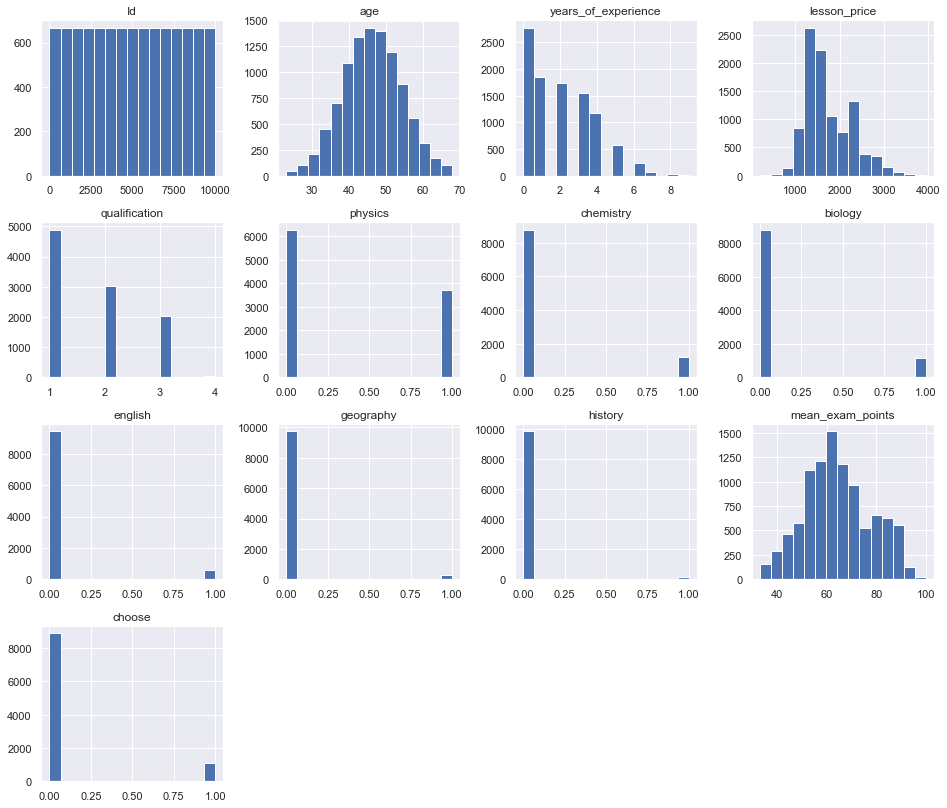

In [249]:
train.hist(figsize =(16,14),bins = 15, grid = True)
plt.show()

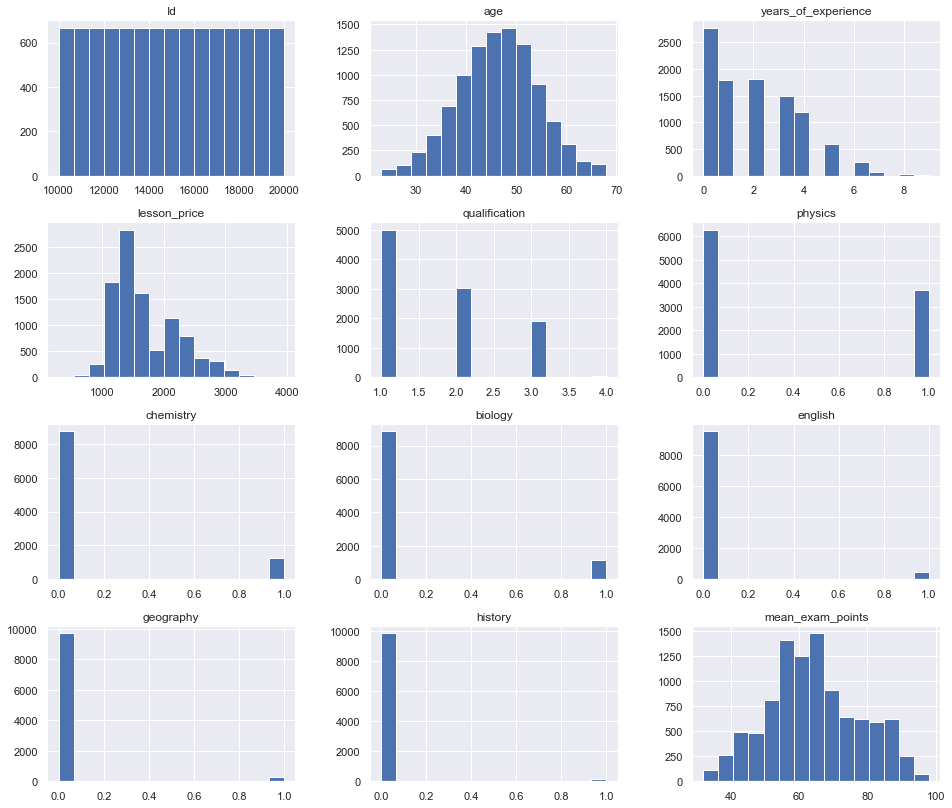

In [250]:
test_df.hist(figsize =(16,14),bins = 15, grid = True)
plt.show()

In [251]:
target = 'choose'
y = train[target]
X = train.drop(columns=['Id', 'choose'])
test_X = test_df.drop(columns='Id')

In [252]:
def Standard(data):
    means = np.mean(data, axis=0)
    stds = np.std(data, axis=0)
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            data[i][j] = (data[i][j] - means[j])/stds[j]
    return data

In [253]:
X = X.values
y = y.values
test_X = test_X.values

In [254]:
#Standard(X)
#Standard(test_X)

In [255]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)


In [256]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8000, 11), (2000, 11), (8000,), (2000,))

In [257]:
#from sklearn.svm import SVR
#clf = SVR(C=55, epsilon=0.0001, gamma ='auto').fit(X_train, y_train)

In [258]:
#y_pred_train = clf.predict(X_train)
#y_pred = clf.predict(X_test)

In [259]:
#print("R^2 на тренировочной выборке: {}".format(r2_score(y_train, y_pred_train)))
#print("R^2 на тестовой выборке: {}".format(r2_score(y_test, y_pred)))

R^2 на тренировочной выборке: 0.9708635111117268
R^2 на тестовой выборке: -0.6024094528137474


In [260]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)



DecisionTreeClassifier()

In [261]:
y_pred = classifier.predict(X_test)


In [262]:
pred_proba = classifier.predict_proba(X_test)

In [263]:
classifier.fit(X,y)

DecisionTreeClassifier()

In [264]:
y_pred = classifier.predict_proba(test_X)

In [265]:
df = pd.DataFrame(y_pred, columns = ['actual','choose'])
df['choose']

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
9995    0.0
9996    0.0
9997    0.0
9998    1.0
9999    0.0
Name: choose, Length: 10000, dtype: float64

In [266]:
submis = pd.concat([test_df['Id'], df['choose']], axis = 1)

In [267]:
submis

,Id,choose
0,10000,0.0
1,10001,0.0
2,10002,0.0
3,10003,0.0
4,10004,0.0
...,...,...
9995,19995,0.0
9996,19996,0.0
9997,19997,0.0
9998,19998,1.0


In [268]:
submis.to_csv('../Desktop/predict.csv', index=None)